# LLM Features Demo

PD-Explain supports integration with LLMs (Large Language Models) to provide additional features and capabilities.\
In this demo, we will explore the LLM features of PD-Explain.

In [1]:
import pandas as pd
import pd_explain

usetex-False


In [2]:
adults = pd.read_csv("../Datasets/adult.csv")
adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## LLM Setup

To use LLM features, you need to set up the LLM API key.\
You can also set the LLM provider, model, and provider URL, if you would like to use a different provider or model than our defaults.\
These settings are stored in a .env file, and can be changed at any time - but they will persist across sessions, so you only need to set them up once.\
Note that this .env file is created automatically when you first run the code, and is stored within the pd_explain package directory with keys that start with "DOT_ENV_PD_EXPLAIN_", so it will not interfere with your other environment variables.\
This will always be stored locally, and will not be shared with anyone else.

In [ ]:
# Set up the LLM API key.
# Replace this with your own API key.
pd_explain.LlmSetupMethods.write_llm_api_key("YOUR_API_KEY")

### Customizing LLM Settings

You can customize the LLM settings by changing the provider, model, and provider URL.\
By default, we use:
- Provider: together
- Model: deepseek-ai/DeepSeek-R1-Distill-Llama-70B-free
- Provider URL: https://api.together.xyz/v1

If you set up the provider as either "together" or "openai", we automatically set the provider url to the correct value. Otherwise, you can set it to any url you want.\
You can also set the model to any model you want, as long as it is compatible with the provider you are using.\
Note that all of the calls below are not needed in a normal session, as the defaults are already set.\

In [ ]:
# Set up the LLM provider
pd_explain.LlmSetupMethods.write_llm_provider("together")

In [ ]:
# Set up the LLM model
pd_explain.LlmSetupMethods.write_llm_model("deepseek-ai/DeepSeek-R1-Distill-Llama-70B-free")

In [ ]:
# Set up the LLM provider URL
pd_explain.LlmSetupMethods.write_provider_url("https://api.together.xyz/v1")

## Adding Reasoning to Explanations

PD-Explain will provide you with statistical and logical explanations for your operations.\
By setting the `add_llm_explanation_reasoning` parameter to True, you can receive additional explanations, utilizing a LLM's domain knowledge and reasoning capabilities, to enhance your understanding of the results.\
Do note - this may take a while to run, as it is entirely dependent on the LLM provider and model you are using.\
Also always remember to take LLM results with a grain of salt, as they are not always correct.\
Also note that the results you get will depend on the model you are using. From our experience, weaker models may often give non-sensical results, while stronger models will give you more meaningful results.\
We recommend using either `deepseek-ai/DeepSeek-R1-Distill-Llama-70B-free` or `meta-llama/Llama-3.3-70B-Instruct-Turbo-Free` for the best results among free models.

### Example 1: Reasoning for a Filter Operation's Explanation

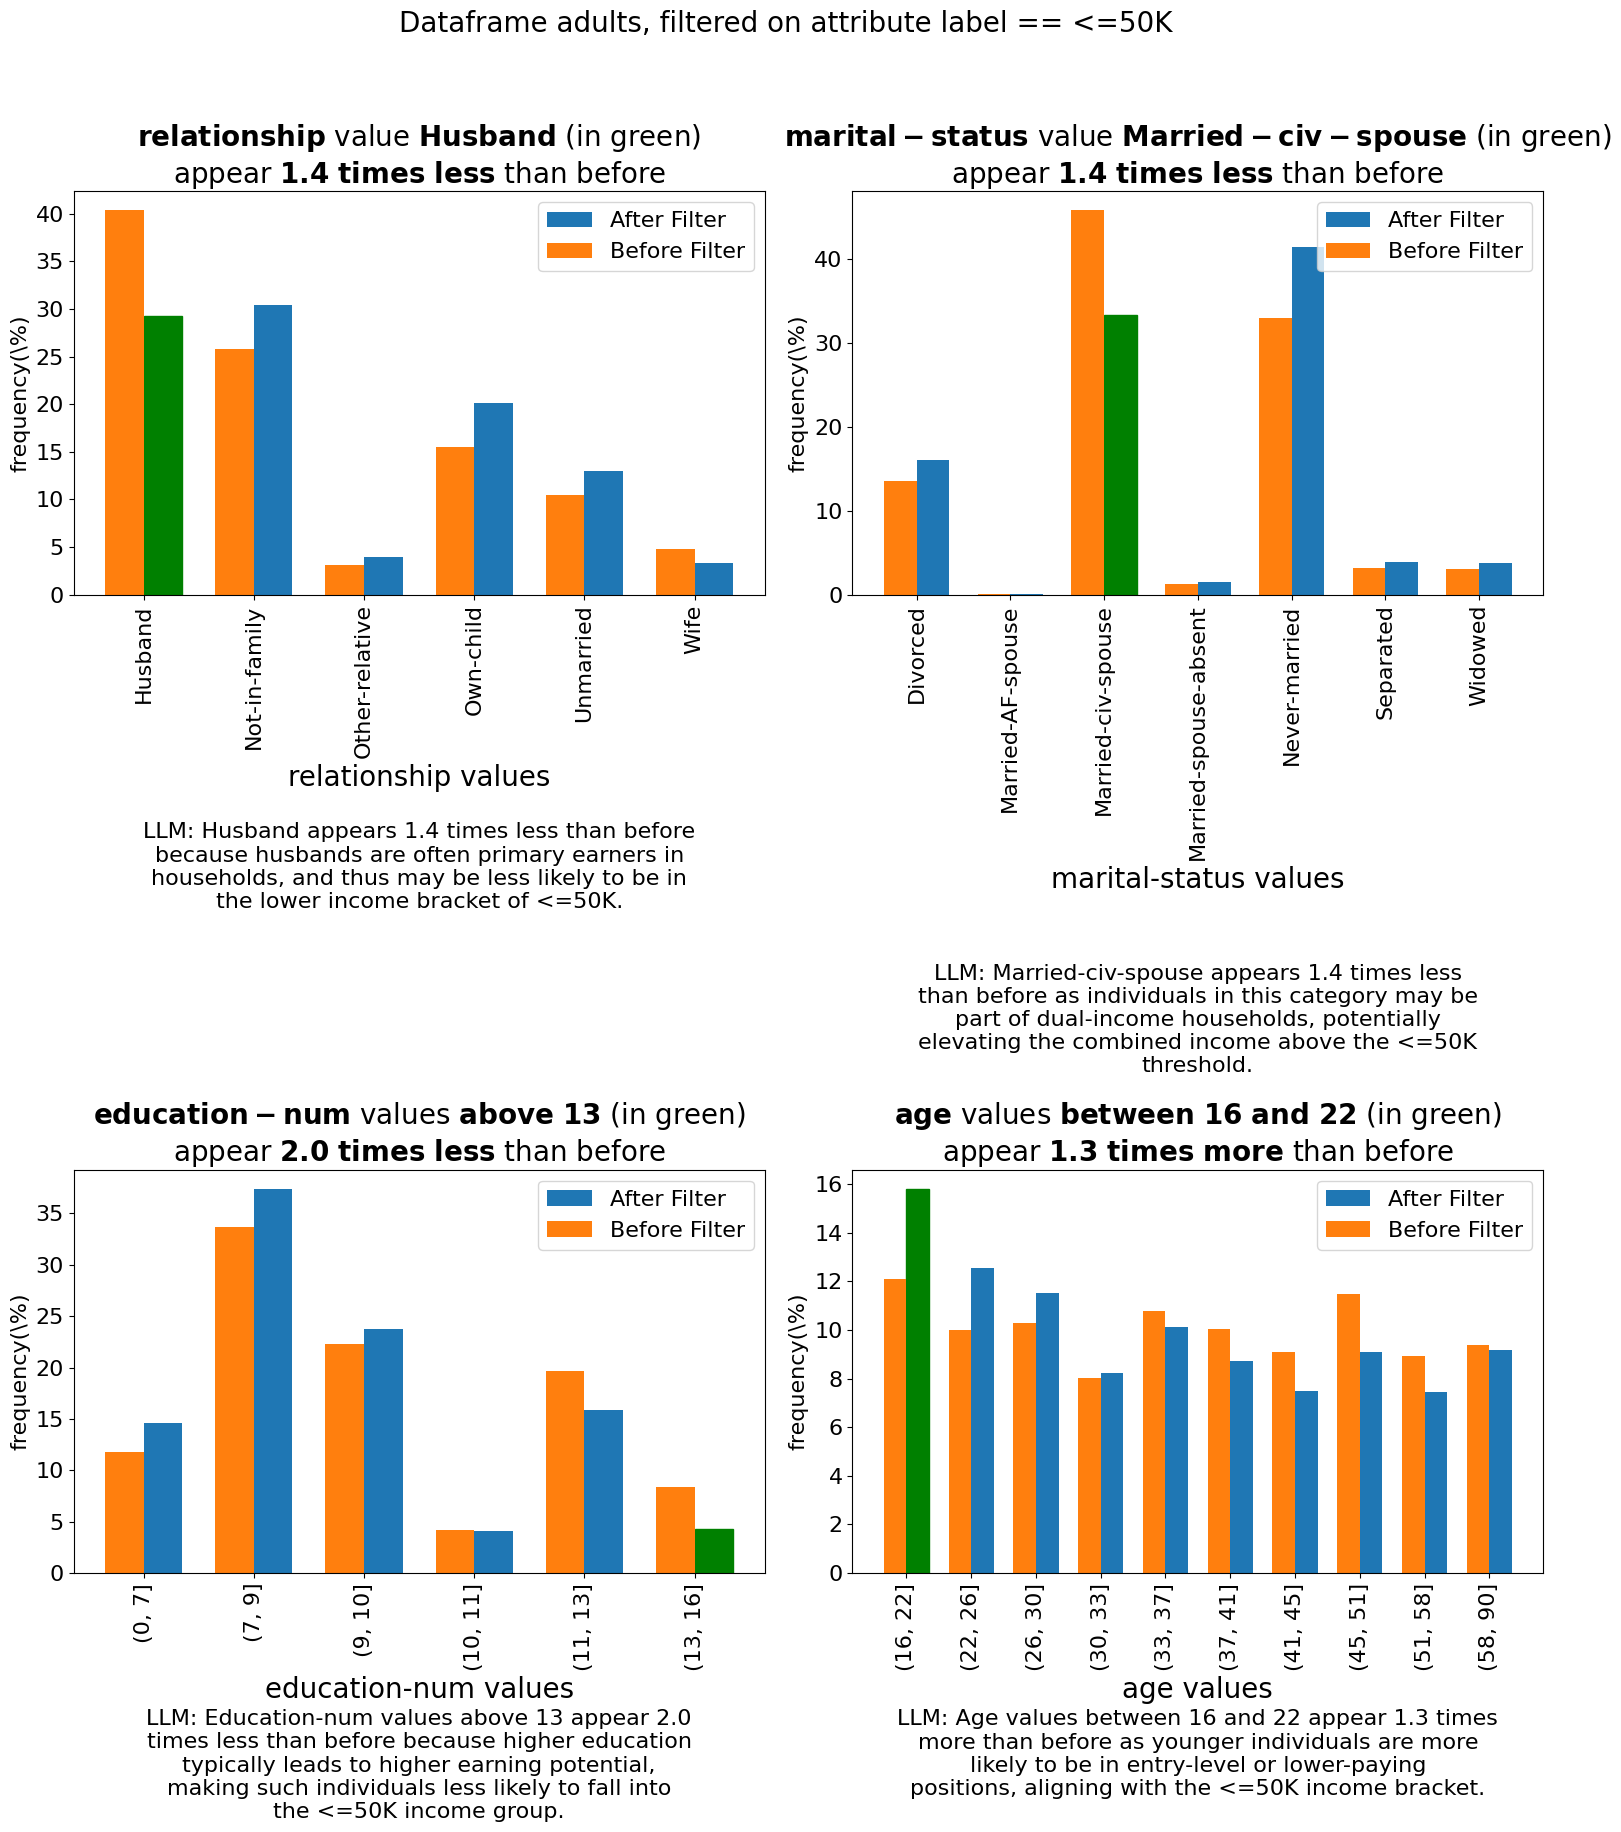

In [3]:
low_income = adults[adults['label'] == '<=50K']
low_income.explain(top_k=4, add_llm_explanation_reasoning=True)

### Example 2: Reasoning for a GroupBy Operation's Explanation

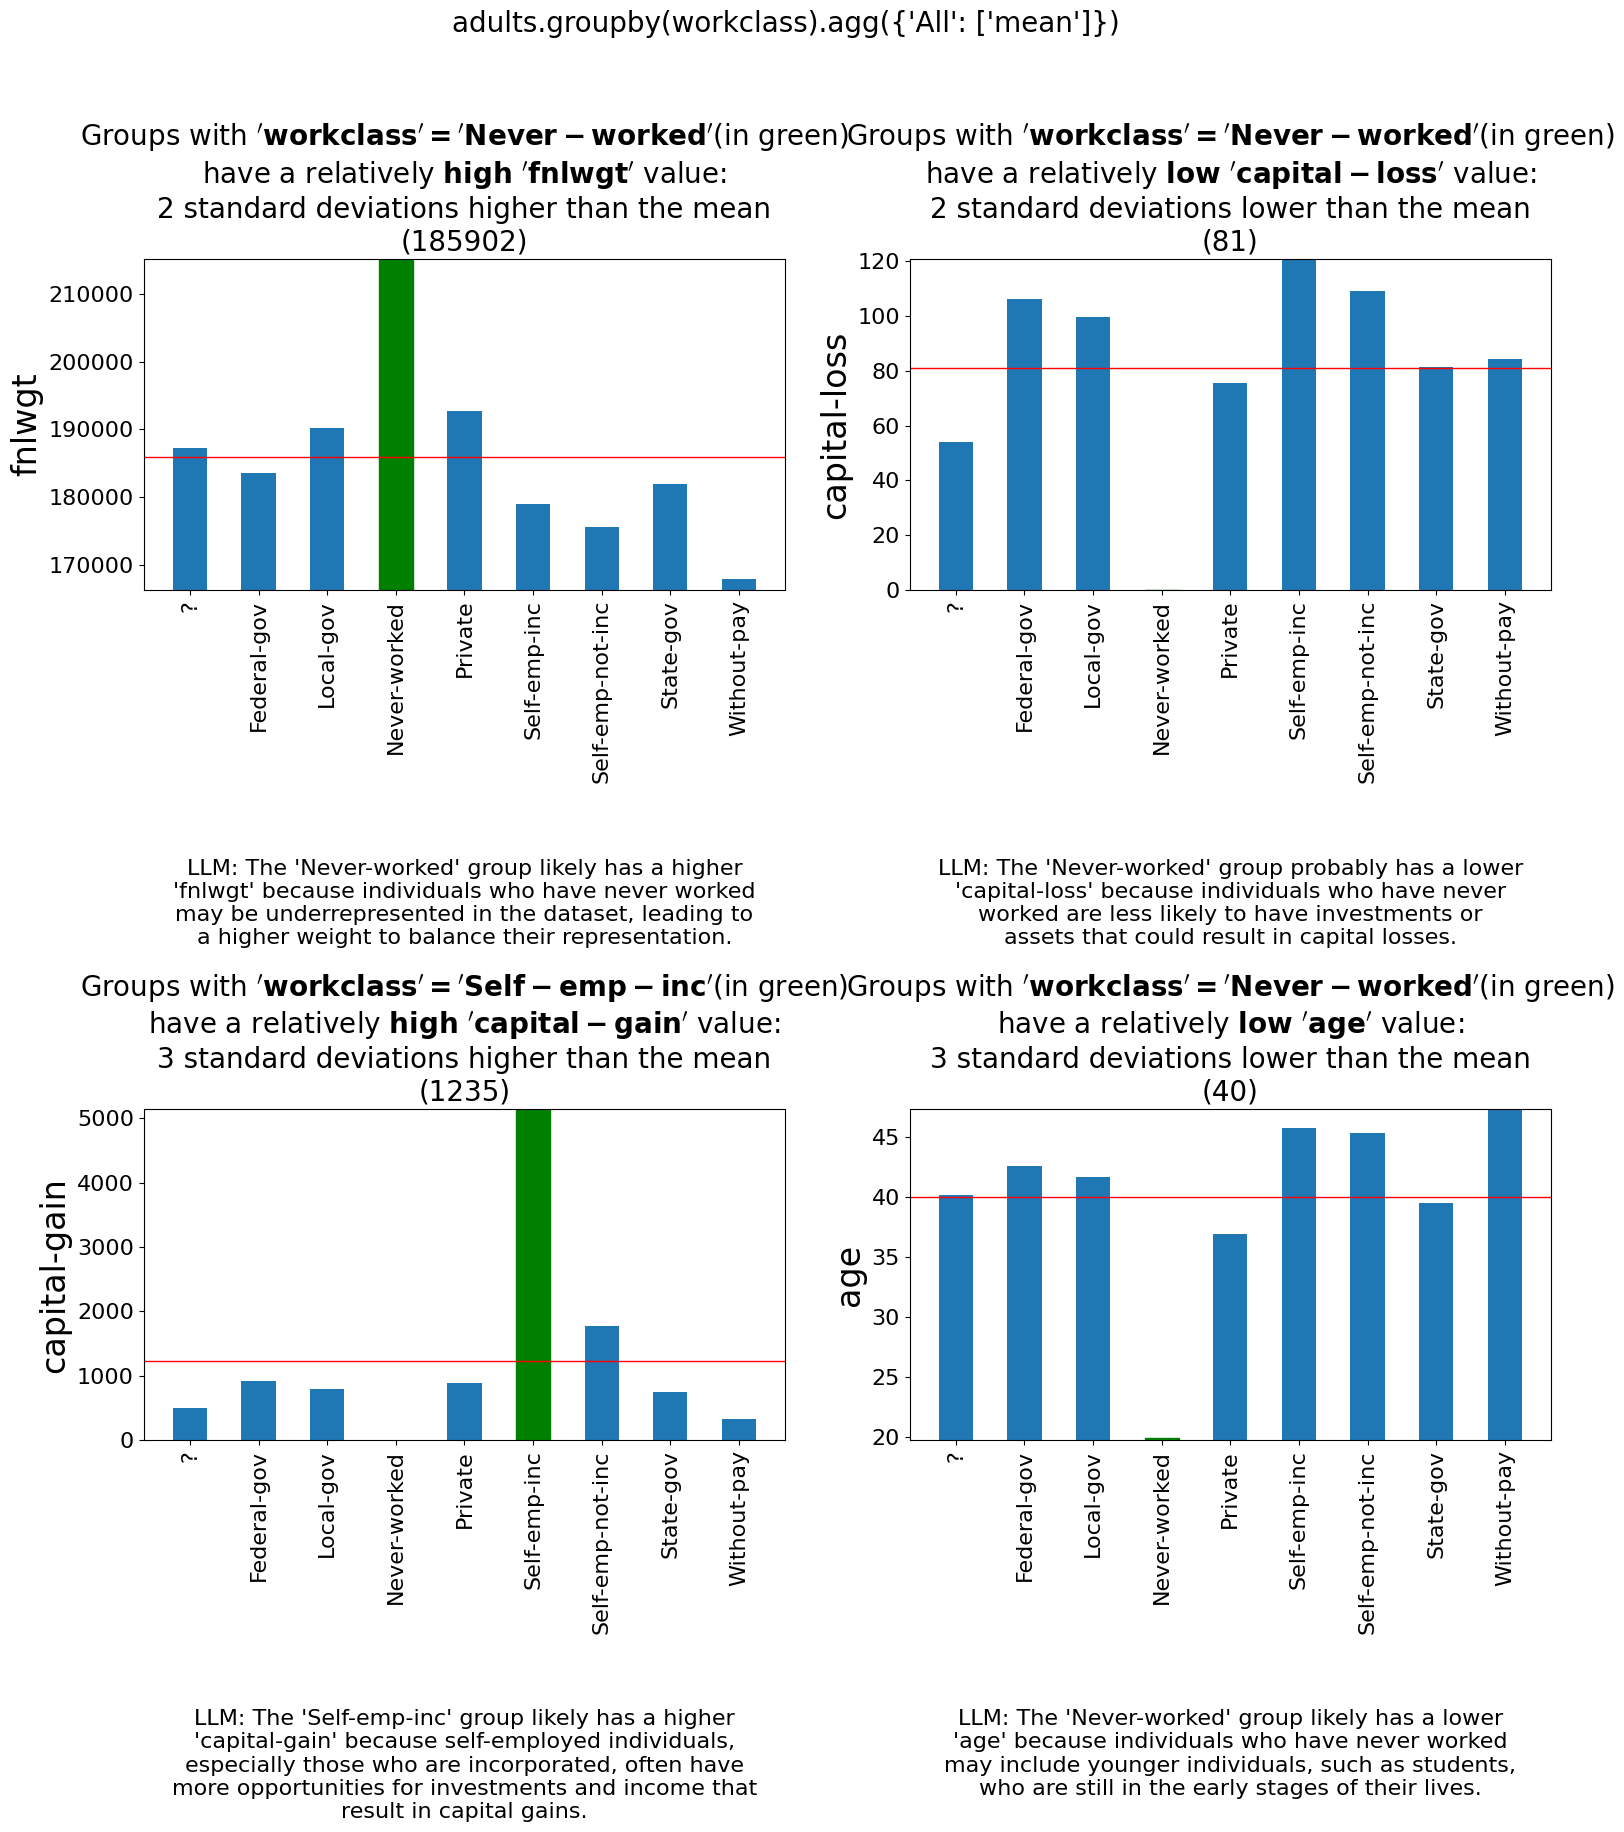

In [4]:
by_workclass = adults.groupby('workclass').mean()
by_workclass.explain(top_k=4, add_llm_explanation_reasoning=True)

### Example 3: Reasoning for Many-to-One Explanations

In [5]:
adults.explain(explainer='many_to_one', labels='label', add_llm_explanation_reasoning=True)

Coverage  \
Group / Cluster Explanation                                                   
<=50K           0 <= capital-gain <= 4243.5                            0.99   
                0 <= capital-gain <= 5095.5                             1.0   
                1 <= education-num <= 10                               0.75   
                0 <= capital-gain <= 5095.5 AND 1 <= education-...     0.75   
>50K            No explanation found                                    NaN   

                                                                   Separation Error  \
Group / Cluster Explanation                                                           
<=50K           0 <= capital-gain <= 4243.5                                     0.2   
                0 <= capital-gain <= 5095.5                                    0.21   
                1 <= education-num <= 10                                       0.15   
                0 <= capital-gain <= 5095.5 AND 1 <= education-...             0.13   
>50K            No explanation found                                            NaN   

                                                                   Separation Error Origins  \
Group / Cluster Explanation                                                                   
<=50K           0 <= capital-gain <= 4243.5                         100.00% from group >50K   
                0 <= capital-gain <= 5095.5                         100.00% from group >50K   
                1 <= education-num <= 10                            100.00% from group >50K   
                0 <= capital-gain <= 5095.5 AND 1 <= education-...  100.00% from group >50K   
>50K            No explanation found                                                    NaN   

                                                                                                      LLM Explanation  
Group / Cluster Explanation                                                                                            
<=50K           0 <= capital-gain <= 4243.5                         LLM: The <=50K group is strongly associated wi...  
                0 <= capital-gain <= 5095.5                         LLM: The <=50K group is almost entirely covere...  
                1 <= education-num <= 10                            LLM: The <=50K group is moderately associated ...  
                0 <= capital-gain <= 5095.5 AND 1 <= education-...  LLM: The combination of lower capital gains (0...  
>50K            No explanation found                                LLM: No explanation was found for the >50K gro...

### Example 4: Reasoning for Outlier Explanations

In [6]:
spotify = pd.read_csv("../Datasets/spotify_all.csv")

In [7]:
new_songs_df = spotify[spotify['year'] >= 1990]

In [8]:
gb_decade = new_songs_df.groupby('decade')['popularity'].sem()
gb_decade

decade
1990    0.073978
2000    0.179497
2010    0.202626
2020    0.360631
Name: popularity_sem, dtype: float64

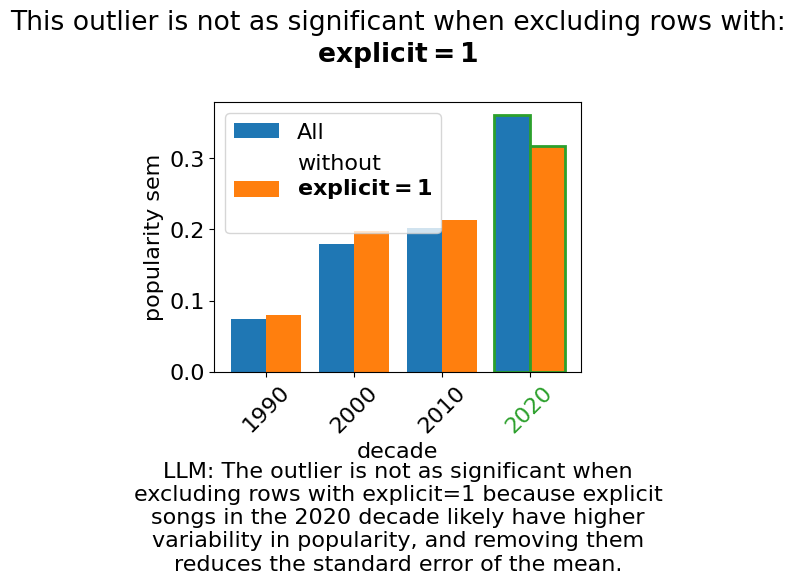

In [9]:
gb_decade.explain(explainer='outlier', target = 2020, dir='high', add_llm_explanation_reasoning=True)

## LLM Query Recommender

PD-Explain supports recommending interesting queries using a LLM.\
We can use the LLM to generate queries based on the provided DataFrame and the history of queries.\
This process is done in two steps:
1. Generate a list of queries using the LLM, based on the DataFrame and the history of queries.
2. Refine the queries using the LLM, utilizing an actor-critic approach to create more interesting queries.

The LLM will try to generate queries that maximize the interestingness scores as measured by pd-explain.\

By default, we generate 4 queries, but you can change this by setting the `num_recommendations` parameter.\
You can also set the `num_iterations` parameter to modify to the number of iterations used to refine the queries. This is set to 2 by default. Note that each iteration calls the LLM twice, so this may take a while to run.\
Overall, there will be 1 + 2 * `num_iterations` calls to the LLM, so be careful with the number of iterations you set.\
\
Additionally, there are the optional parameters:
  * `custom_requests` - which allows you to provide additional requests to the LLM. Defaults to `None`.
  * `return_all_options` - if `True`, will return every query generated throughout the process instead of just the top `k = num_recommendations` queries. Defaults to `False`.

The score you get back from the recommendation process is always between 0 and 1, and is based on the scores we give when choosing and creating explanations.\
Note that because this process utilizes LLMs, you will likely get different recommendations every time you run this.


In [12]:
adults.llm_recommend(num_recommendations=4, num_iterations=2)

Finished generating initial recommendations.
Finished iteration 1 of the refinement process. 
Finished iteration 2 of the refinement process. 
Number of final recommendations: 12


,query,score
0,adults.groupby('workclass').agg({'age': ['mean...,0.473499
1,"adults.groupby(['marital-status', 'occupation'...",0.404049
2,"adults.groupby(['sex', 'workclass']).agg({'age...",0.378203
3,"adults.groupby(['race', 'marital-status']).agg...",0.371564


In [13]:
res = adults.groupby('workclass').agg({'age': ['mean', 'std', 'max'], 'hours-per-week': ['mean', 'std', 'max'], 'capital-gain': 'mean', 'capital-loss': 'mean'})
res

age                hours-per-week                 \
                       mean        std max           mean        std max   
workclass                                                                  
?                 40.141122  20.228795  90      31.812433  15.070629  99   
Federal-gov       42.577514  11.437656  90      41.513268   8.927996  99   
Local-gov         41.676020  12.458119  90      40.847258  10.825509  99   
Never-worked      19.900000   3.984693  30      28.900000  13.076272  40   
Private           36.903144  12.907635  90      40.273137  11.234400  99   
Self-emp-inc      45.799410  12.657457  85      48.570501  14.242696  99   
Self-emp-not-inc  45.332470  13.507114  90      44.395132  16.717258  99   
State-gov         39.512367  12.377418  81      39.090863  11.970790  99   
Without-pay       47.285714  20.090154  74      33.952381  16.758509  65   

                 capital-gain capital-loss  
                         mean         mean  
workclass                                   
?                  502.946052    67.634870  
Federal-gov        923.287709   108.884078  
Local-gov          798.228635   102.124043  
Never-worked         0.000000     0.000000  
Private            896.135374    80.768478  
Self-emp-inc      5132.794100   166.219469  
Self-emp-not-inc  1781.744692   109.347488  
State-gov          756.336194    82.700656  
Without-pay        325.238095    89.857143

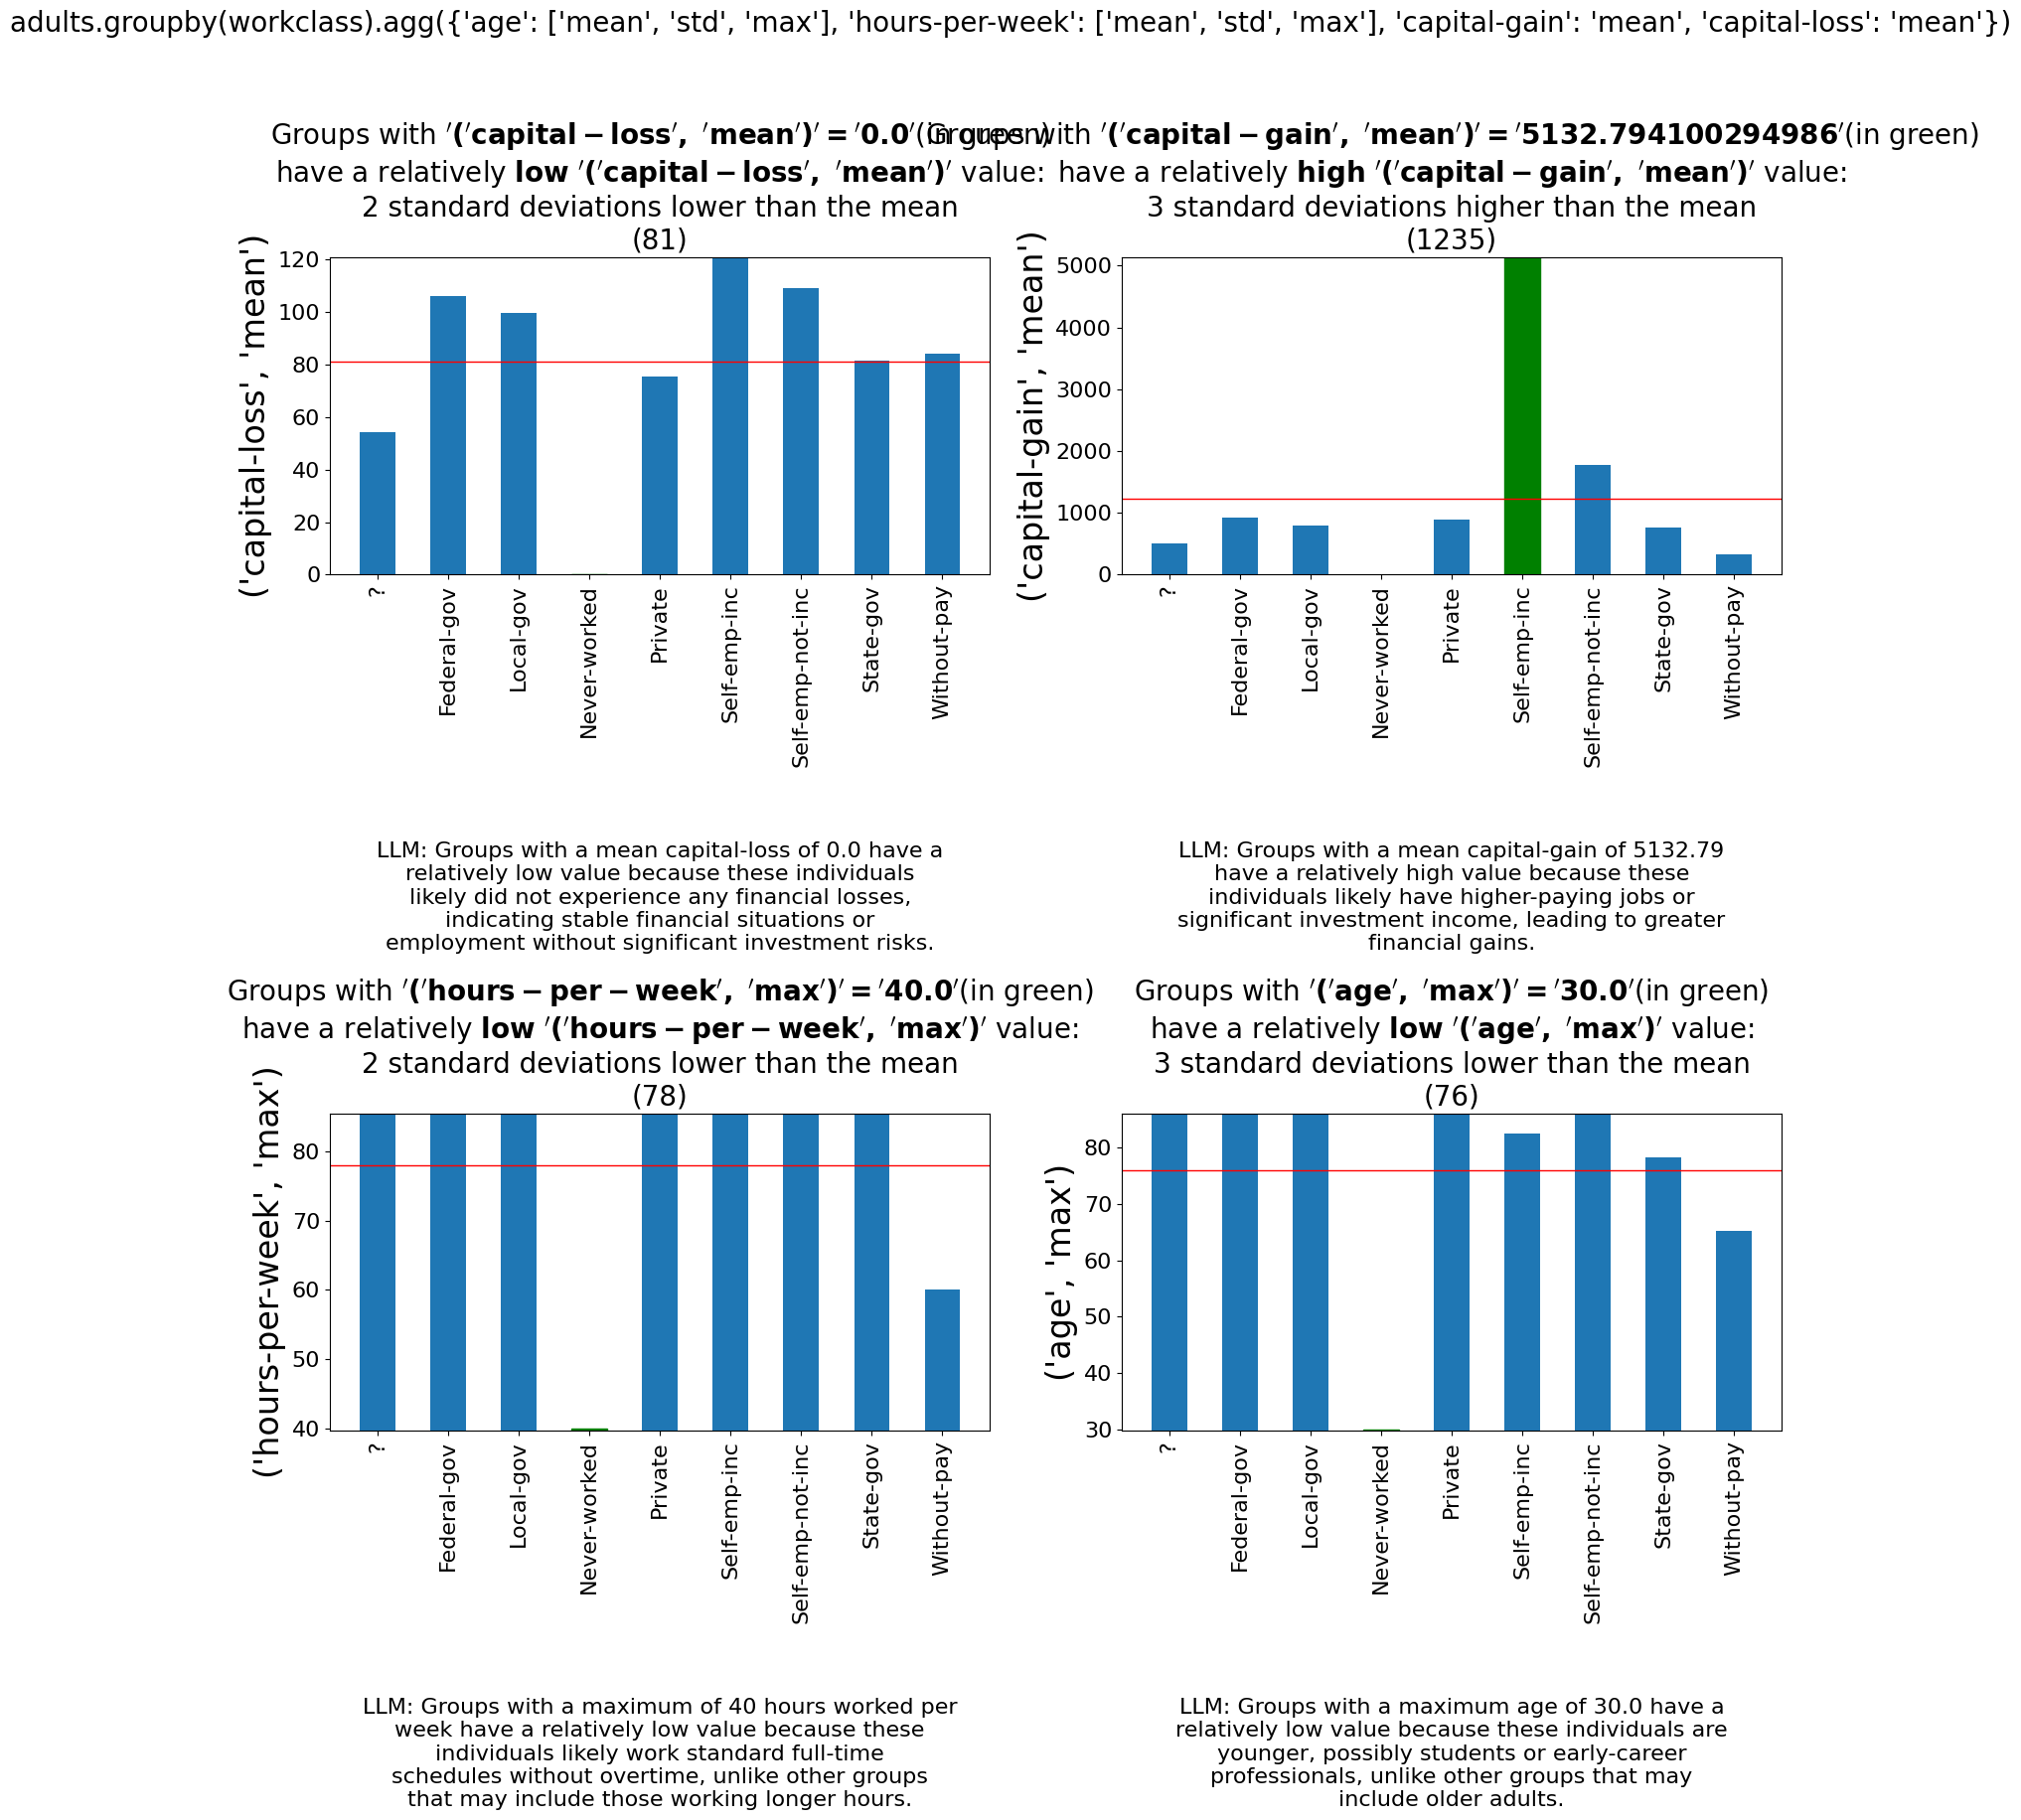

In [14]:
res.explain(top_k=4, add_llm_explanation_reasoning=True)

### How it works - step by step

When you call the .explain() to explain a filter / groupby / join query, we log the query in a log file (this file is saved locally and will never be sent anywhere by pd-explain), where we save:
1. The name of the dataset parameter
2. The query itself
3. An interestingness score computed by pd-explain
4. A timestamp

This example was created using the following log:

In [4]:
from pd_explain.query_recommenders.query_logger import QueryLogger
logger = QueryLogger()
# This will get the 10 most recent queries done on the "adults" dataframe
logger.get_log("adults")

,query,interestingness_score,timestamp
dataframe_name,,,
adults,adults[age < 30 | >= 70],0.217721,2025-04-18 21:48:12
adults,adults[age >= 30 & < 70],0.098977,2025-04-18 21:44:46
adults,adults[label == >50K],0.288833,2025-04-18 21:31:34
adults,adults[label == <=50K],0.095440,2025-04-18 21:31:33
adults,adults.groupby(workclass).agg({'All': ['mean']}),0.462752,2025-04-18 21:31:31


You can delete the logs by calling `logger.delete_log()`

These logs, along with some general information about the dataframe, are passed to a LLM, asking it to generate a list of queries.

In [5]:
from pd_explain.llm_integrations.llm_query_recommender import LLMQueryRecommender
recommender = LLMQueryRecommender(adults, "adults", logger.get_log("adults"))
recommendations = recommender.do_llm_action()
recommendations

0    adults.groupby('education').agg({'hours-per-we...
1    adults.groupby('race')['marital-status'].value...
2    adults.groupby('occupation').agg({'age': 'mean...
3    adults.groupby(['sex', 'workclass']).agg({'fnl...
Name: recommendations, dtype: object

Next, the recommendations are applied to the dataframe itself

In [6]:
applied_recommendations = recommender.do_follow_up_action(recommendations)
applied_recommendations

{"adults.groupby('education').agg({'hours-per-week': 'mean', 'capital-gain': 'mean', 'capital-loss': 'mean', 'age': 'mean'})": {'result':               hours-per-week  capital-gain  capital-loss        age
  education                                                          
  10th               36.986321    323.049676     54.943125  37.902808
  11th               33.952539    203.739514     52.077815  32.141832
  12th               35.374429    208.579909     28.852359  32.235921
  1st-4th            38.761134    123.591093     48.097166  46.639676
  5th-6th            38.923379    360.365422     64.927308  43.585462
  7th-8th            39.003141    242.626178     59.672251  49.525654
  9th                38.359788    313.398148     35.915344  40.902116
  Assoc-acdm         40.809494    636.951905     90.575890  37.777014
  Assoc-voc          41.658418    778.602135     72.714216  38.651140
  Bachelors          42.482492   1762.564984    124.771340  38.896324
  Doctorate          46.

These recommendations are then scored:

In [7]:
from pd_explain.query_recommenders.llm_based_query_recommender import LLMBasedQueryRecommender
# This class is the one that actually manages the whole process usually, and does this whole step by step process by simply calling .recommend().
recommender = LLMBasedQueryRecommender(adults, "adults")

In [8]:
recommendations = {}
for query, query_result in applied_recommendations.items():
    # Score the query
    scores, score = recommender._score_query(query, query_result)
    recommendations[query] = {
        "query_result": query_result["result"],
        "score_dict": scores,
        "score": score
    }

In [9]:
recommendations

{"adults.groupby('education').agg({'hours-per-week': 'mean', 'capital-gain': 'mean', 'capital-loss': 'mean', 'age': 'mean'})": {'query_result':               hours-per-week  capital-gain  capital-loss        age
  education                                                          
  10th               36.986321    323.049676     54.943125  37.902808
  11th               33.952539    203.739514     52.077815  32.141832
  12th               35.374429    208.579909     28.852359  32.235921
  1st-4th            38.761134    123.591093     48.097166  46.639676
  5th-6th            38.923379    360.365422     64.927308  43.585462
  7th-8th            39.003141    242.626178     59.672251  49.525654
  9th                38.359788    313.398148     35.915344  40.902116
  Assoc-acdm         40.809494    636.951905     90.575890  37.777014
  Assoc-voc          41.658418    778.602135     72.714216  38.651140
  Bachelors          42.482492   1762.564984    124.771340  38.896324
  Doctorate       

We then refine the queries using an actor-critic multi-agent framework:\
One LLM instance acts as the critic, analyzing the scores and explaining the good and bad parts of the score.\
Another LLM instance acts as the actor, refining the queries based on the critic's input.\
This is done `n` times, after-which the `k` highest ranking queries are returned.

In [11]:
from pd_explain.llm_integrations.query_refiner import QueryRefiner
refiner = QueryRefiner(adults, "adults", recommendations, recommender._score_query)
refined_recommendations = refiner.do_llm_action()
refined_recommendations

Finished iteration 1 of the refinement process. 
Finished iteration 2 of the refinement process. 
Number of final recommendations: 12


,query,score
0,adults.groupby('education').agg({'hours-per-we...,0.364443
1,adults.groupby('occupation').agg({'age': 'mean...,0.326727
2,adults.groupby('education').agg({'hours-per-we...,0.320863
3,adults.groupby('education').agg({'hours-per-we...,0.320101


All of this is managed for you via calling the .llm_recommend().